# Experiment tracking with [WandB](https://wandb.ai/)

[Weights and Biases](https://wandb.ai/) is an experment tracking tool that is great for its lightweight logging utilities. 

## Setup WandB
After initializing a run, we can track all the Damuta model specs to the wandb run config. Specs you may want to track are: datasets (as [artifacts](https://docs.wandb.ai/guides/artifacts)), model parameters (as a [config](https://docs.wandb.ai/guides/track/config)) or metrics and plots (as [logged data](https://docs.wandb.ai/guides/track/log))

**Warning**: Private data may not be appropriate to upload to WandB. See [storage FAQ](https://docs.wandb.ai/guides/artifacts/artifacts-faqs#where-are-artifact-files-stored) to ensure that WandB policies are compliant with your data-handling requirements.

In [1]:
import wandb
import numpy as np
import pandas as pd
import damuta as da
from damuta import DataSet

# Initialize wandb run
run = wandb.init()

wandb: Currently logged in as: harrig12 (use `wandb login --relogin` to force relogin)
wandb: wandb version 0.12.11 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


<Figure size 432x288 with 0 Axes>

In [2]:
# Read in example pcawg data
counts_fp = 'example_data/pcawg_counts.csv'
annotation_fp = 'example_data/pcawg_cancer_types.csv'
counts = pd.read_csv(counts_fp, index_col=0)
annotation = pd.read_csv(annotation_fp, index_col=0)

# Log data as an artifact
wandb.log_artifact(counts_fp, name='pcawg_counts', type='example_dataset')
wandb.log_artifact(annotation_fp, name='pcawg_annotation', type='example_dataset')

In [3]:
# Instantiate the model
model = da.models.Lda(DataSet(counts, annotation), n_sigs = 20)

# Log model parameters, and fitting parameters to wandb
fit_kwargs = {"n": 600, "init_strategy": "uniform"}
run.config.setdefaults({"opt_method": model.opt_method, "seed": model.seed,
                        **model.model_kwargs, **fit_kwargs})

# Fit the model
model.fit(**fit_kwargs)

Interrupted at 557 [55%]: Average Loss = 5.0559e+07


`model.fit_kwargs` can also be accessed from the model object in the same manner as `model.model_kwargs`, but not until after `model.fit()` has been called. 

If necessary, The wandb config can be updated after `model.fit()` has been called. 

Now that we have fit the model, we plot the ELBO, and log the final value with wandb

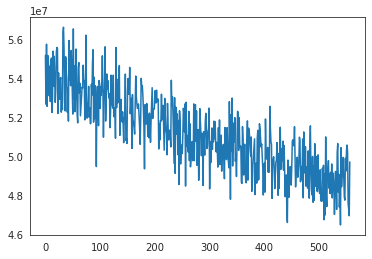

In [4]:
import matplotlib.pyplot as plt
plt.plot(model.approx.hist)

In [1]:
wandb.log({"final ELBO": model.approx.hist[-1]})

NameError: name 'model' is not defined

We can also make use of callbacks to log this value over inference. This way, our ELBO plot will be automatically generated by wandb, and will life-update on the wandb dashboard as we fit the model. 

In [5]:
model.fit(**fit_kwargs, callbacks = [da.callbacks.log_elbo()])

AttributeError: module 'damuta' has no attribute 'callbacks'